In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [7]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.00, size=1500)

lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Date": city_date,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,}                         
                          )

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | basco
Processing Record 2 of Set 1 | berdigestyakh
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | bilma
Processing Record 7 of Set 1 | maunabo
Processing Record 8 of Set 1 | khuzhir
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | eenhana
Processing Record 11 of Set 1 | mahebourg
Processing Record 12 of Set 1 | jieshi
Processing Record 13 of Set 1 | port hedland
Processing Record 14 of Set 1 | komsomolskiy
Processing Record 15 of Set 1 | bloemfontein
Processing Record 16 of Set 1 | arcata
Processing Record 17 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | dikson
Processing Record

Processing Record 36 of Set 4 | grand gaube
Processing Record 37 of Set 4 | zimmi
Processing Record 38 of Set 4 | avarua
Processing Record 39 of Set 4 | karratha
Processing Record 40 of Set 4 | arawa
Processing Record 41 of Set 4 | padang
Processing Record 42 of Set 4 | vyshneve
Processing Record 43 of Set 4 | cockburn town
Processing Record 44 of Set 4 | northam
Processing Record 45 of Set 4 | vao
Processing Record 46 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 47 of Set 4 | kabare
Processing Record 48 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 49 of Set 4 | lebu
Processing Record 50 of Set 4 | port elizabeth
Processing Record 1 of Set 5 | mehamn
Processing Record 2 of Set 5 | kununurra
Processing Record 3 of Set 5 | georgetown
Processing Record 4 of Set 5 | kosa
Processing Record 5 of Set 5 | sao domingos do prata
Processing Record 6 of Set 5 | araouane
Processing Record 7 of Set 5 | sola
Processing Record 8 of Set 5 | wuwei
Processi

Processing Record 26 of Set 8 | ballina
Processing Record 27 of Set 8 | antalaha
Processing Record 28 of Set 8 | pleasanton
Processing Record 29 of Set 8 | ipixuna
Processing Record 30 of Set 8 | sao francisco
Processing Record 31 of Set 8 | bismil
Processing Record 32 of Set 8 | taltal
Processing Record 33 of Set 8 | faanui
Processing Record 34 of Set 8 | trelew
Processing Record 35 of Set 8 | verkhnyaya inta
Processing Record 36 of Set 8 | bolshoy lug
Processing Record 37 of Set 8 | toliary
City not found. Skipping...
Processing Record 38 of Set 8 | muli
Processing Record 39 of Set 8 | cornetu
Processing Record 40 of Set 8 | sholokhovskiy
Processing Record 41 of Set 8 | ardistan
City not found. Skipping...
Processing Record 42 of Set 8 | raudeberg
Processing Record 43 of Set 8 | ouallam
Processing Record 44 of Set 8 | henties bay
Processing Record 45 of Set 8 | ijaki
City not found. Skipping...
Processing Record 46 of Set 8 | fangshan
Processing Record 47 of Set 8 | taoudenni
Process

Processing Record 12 of Set 12 | zhangye
Processing Record 13 of Set 12 | san javier
Processing Record 14 of Set 12 | nongstoin
Processing Record 15 of Set 12 | myitkyina
Processing Record 16 of Set 12 | kuusamo
Processing Record 17 of Set 12 | nhlangano
Processing Record 18 of Set 12 | tidore
City not found. Skipping...
Processing Record 19 of Set 12 | hanzhong
Processing Record 20 of Set 12 | shenjiamen
Processing Record 21 of Set 12 | husavik
Processing Record 22 of Set 12 | yunyang
Processing Record 23 of Set 12 | kungurtug
Processing Record 24 of Set 12 | kindu
Processing Record 25 of Set 12 | kuvandyk
Processing Record 26 of Set 12 | erie
Processing Record 27 of Set 12 | liverpool
Processing Record 28 of Set 12 | tsumeb
Processing Record 29 of Set 12 | virginia beach
Processing Record 30 of Set 12 | macia
Processing Record 31 of Set 12 | baishishan
Processing Record 32 of Set 12 | mwinilunga
Processing Record 33 of Set 12 | may pen
Processing Record 34 of Set 12 | nuuk
Processing

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Basco,PH,2022-12-08 23:03:06,20.4487,121.9702,78.75,81,88,19.10
1,Berdigestyakh,RU,2022-12-08 23:03:06,62.0989,126.6992,-24.23,97,100,5.64
2,Bredasdorp,ZA,2022-12-08 23:03:07,-34.5322,20.0403,67.62,90,78,6.80
3,Ushuaia,AR,2022-12-08 23:00:58,-54.8000,-68.3000,41.31,94,99,5.41
4,Hobart,AU,2022-12-08 23:00:12,-42.8794,147.3294,57.06,71,20,14.97
5,Bilma,NE,2022-12-08 23:03:08,18.6853,12.9164,66.88,19,15,4.94
6,Maunabo,PR,2022-12-08 23:03:08,18.0072,-65.8993,77.29,76,0,8.88
7,Khuzhir,RU,2022-12-08 23:03:08,53.1939,107.3397,13.69,67,100,12.57
8,Saint-Philippe,RE,2022-12-08 23:03:09,-21.3585,55.7679,74.79,87,26,12.97
9,Eenhana,NA,2022-12-08 23:03:09,-17.4667,16.3333,71.22,21,2,4.97


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Basco,PH,2022-12-08 23:03:06,20.4487,121.9702,78.75,81,88,19.10
1,Berdigestyakh,RU,2022-12-08 23:03:06,62.0989,126.6992,-24.23,97,100,5.64
2,Bredasdorp,ZA,2022-12-08 23:03:07,-34.5322,20.0403,67.62,90,78,6.80
3,Ushuaia,AR,2022-12-08 23:00:58,-54.8000,-68.3000,41.31,94,99,5.41
4,Hobart,AU,2022-12-08 23:00:12,-42.8794,147.3294,57.06,71,20,14.97


In [14]:
# Create the output file (CSV).
output_data_file = "Resources/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

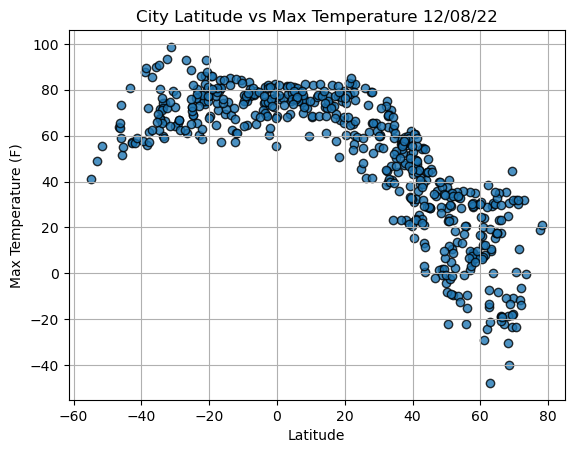

In [17]:
# Import time module

import time

# Build the scatter plot for latitude vs max temp.

plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=.8, label="Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

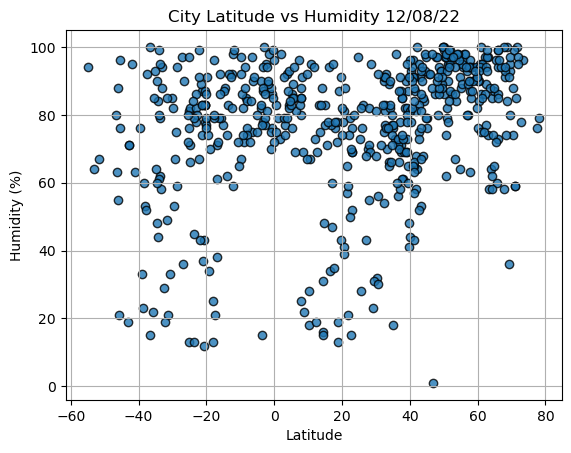

In [18]:
# Build the scatter plot for latitude vs humidity.

plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=.8, label="Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

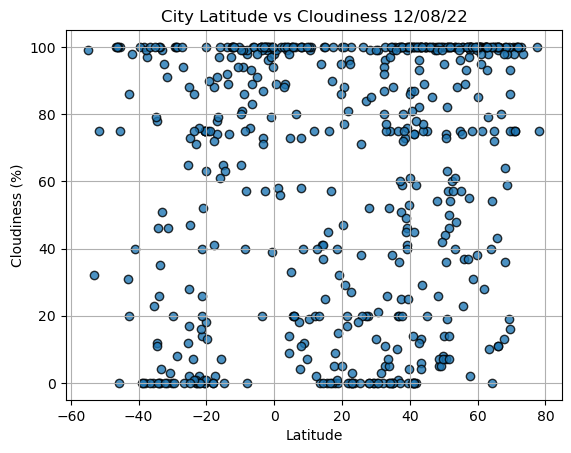

In [19]:
# Build the scatter plot for latitude vs cloudiness.

plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=.8, label="Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

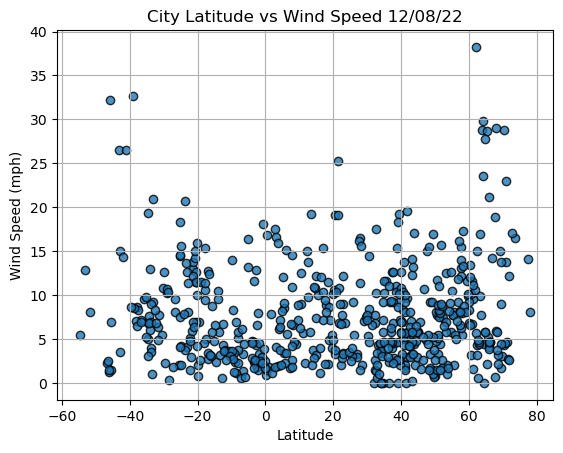

In [20]:
# Build the scatter plot for latitude vs wind speed.

plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=.8, label="Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                 Komsomolskiy
Country                        UZ
Date          2022-12-08 23:03:13
Lat                       40.4272
Lng                       71.7189
Max Temp                    30.92
Humidity                       93
Cloudiness                    100
Wind Speed                   6.91
Name: 13, dtype: object

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

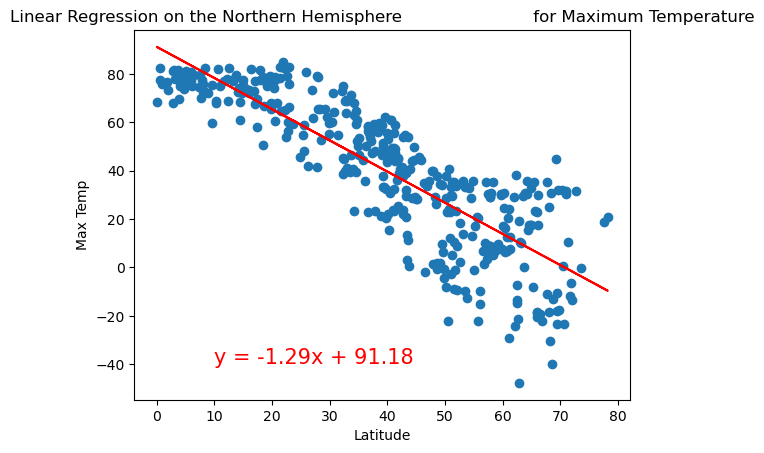

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-40))

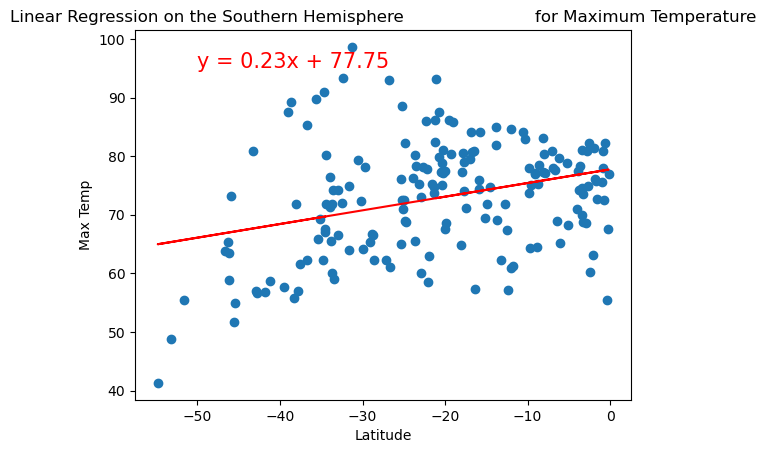

In [27]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,95))

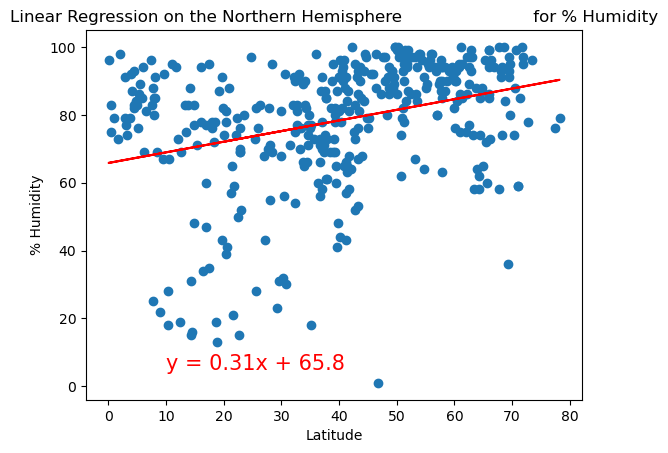

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(10, 5))

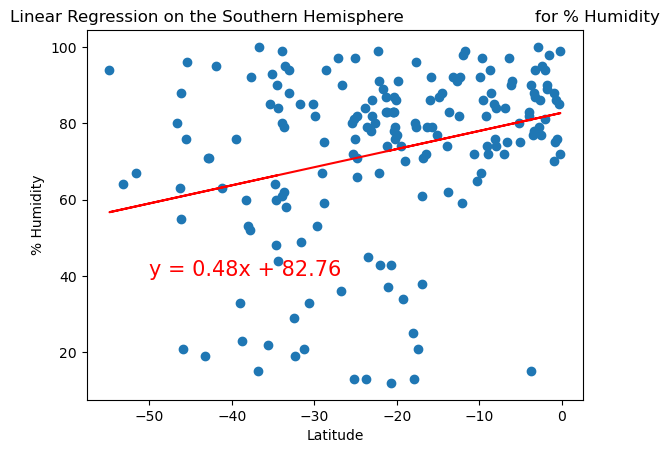

In [31]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50, 40))

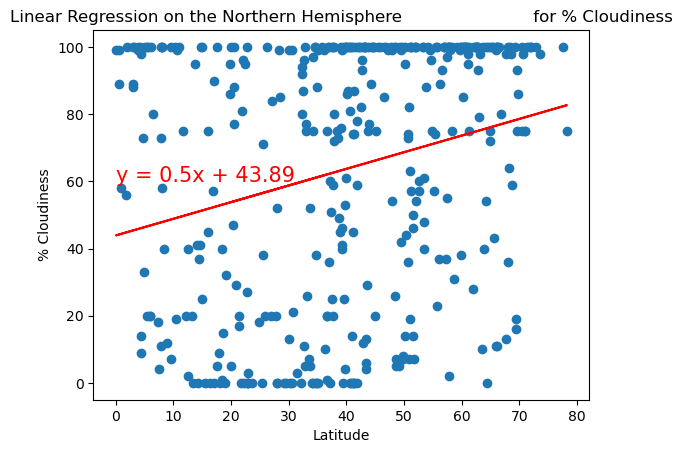

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0, 60))

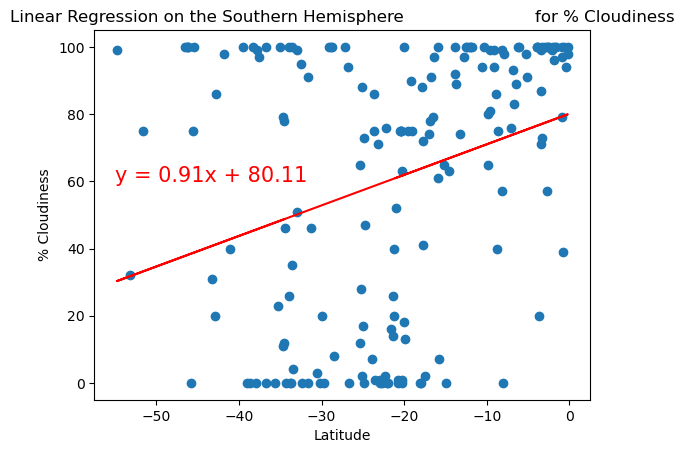

In [39]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-55, 60))

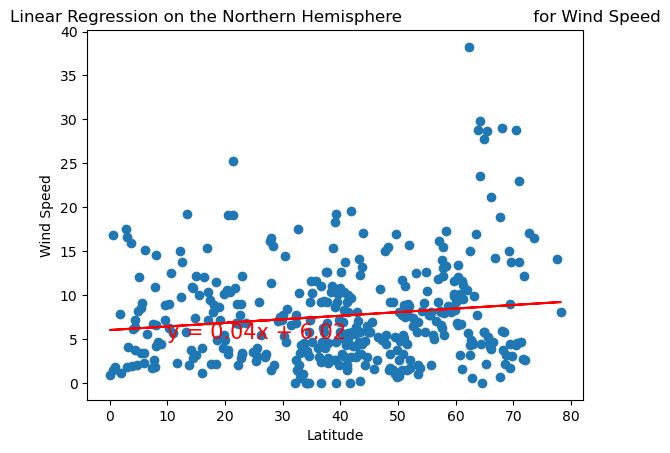

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10, 5))